In [1]:
import pandas as pd
# import sklearn
import numpy as np
import seaborn as sns
import string
import nltk
from nltk.corpus import  stopwords
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('messages.csv')
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [3]:
df.shape

(2893, 3)

In [4]:
df.isna().sum()

subject    62
message     0
label       0
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.shape

(2831, 3)

In [7]:
print ('ham and spam counts','\n',df.label.value_counts())

ham and spam counts 
 0    2363
1     468
Name: label, dtype: int64


In [8]:
df['length'] = df.message.str.len()
df.head()

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0,4492


In [9]:
df['message'] = df['message'].str.lower()

In [10]:
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
df['message'] = df['message'].str.replace(r'£|\$', 'dollers')
df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [11]:
df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')
df['message'] = df['message'].str.replace(r'\s+', ' ')
df['message'] = df['message'].str.replace(r'^\s+|\s+?$', '')

In [12]:
df.head(10)

,subject,message,label,length
0,job posting - apple-iss research center,content length numbr apple iss research center...,0,2856
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas sa...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046
5,call for abstracts : optimality in syntactic t...,content length numbr call for papers is the be...,0,4492
6,m . a . in scandinavian linguistics,m a in scandinavian linguistics at the univers...,0,2201
7,call for papers : linguistics session of the m...,call for papers linguistics session midwest mo...,0,802
8,foreign language in commercials,content length numbr greetings i m wondering i...,0,1230
9,fulbright announcement : please post / dissemi...,fulbright announcement please post disseminate...,0,1478
10,gala ' 95 : call for papers,groningen assembly on language acquisition num...,0,2472


In [13]:
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['message'] = df['message'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [14]:
df['clean_length'] = df.message.str.len()
df.head(10)

,subject,message,label,length,clean_length
0,job posting - apple-iss research center,content length numbr apple iss research center...,0,2856,2179
2,query : letter frequencies for text identifica...,posting inquiry sergei atamas satamas umabnet ...,0,1435,1064
3,risk,colleague researching differing degrees risk p...,0,324,210
4,request book information,earlier morning phone friend mine living south...,0,1046,629
5,call for abstracts : optimality in syntactic t...,content length numbr call papers best good eno...,0,4492,3370
6,m . a . in scandinavian linguistics,scandinavian linguistics university tromsoe nu...,0,2201,1579
7,call for papers : linguistics session of the m...,call papers linguistics session midwest modern...,0,802,657
8,foreign language in commercials,content length numbr greetings wondering someo...,0,1230,800
9,fulbright announcement : please post / dissemi...,fulbright announcement please post disseminate...,0,1478,1220
10,gala ' 95 : call for papers,groningen assembly language acquisition numbr ...,0,2472,1753


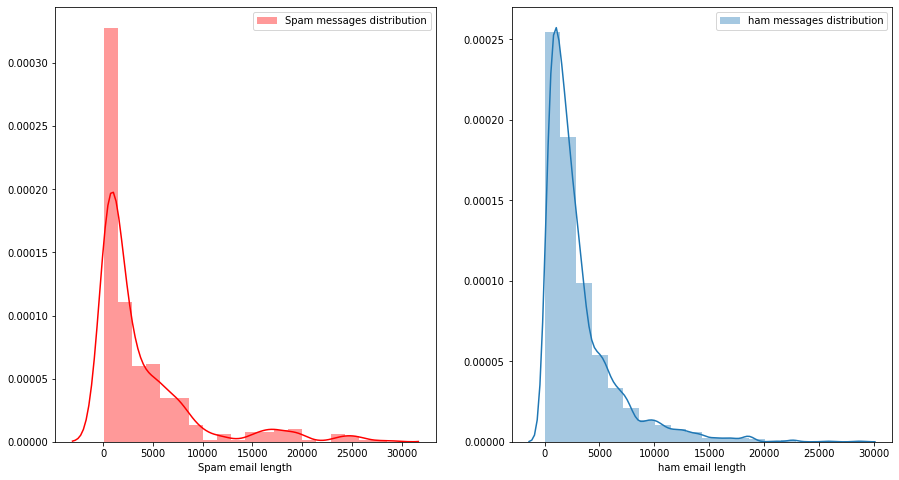

In [15]:
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam email length')
ax[0].legend()

sns.distplot(df[df['label']==0]['length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham email length')
ax[1].legend()

plt.show()

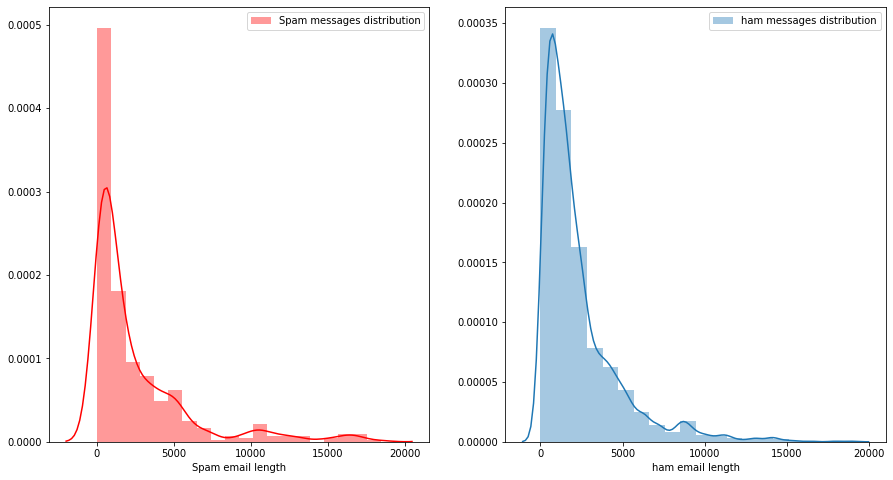

In [16]:
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['clean_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam email length')
ax[0].legend()

sns.distplot(df[df['label']==0]['clean_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham email length')
ax[1].legend()

plt.show()

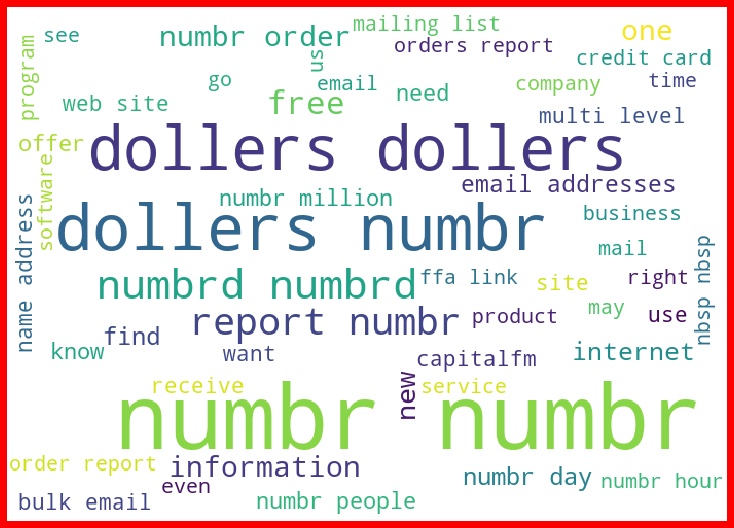

In [17]:
from wordcloud import WordCloud


spams =df['message'][df['label']==1]
spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

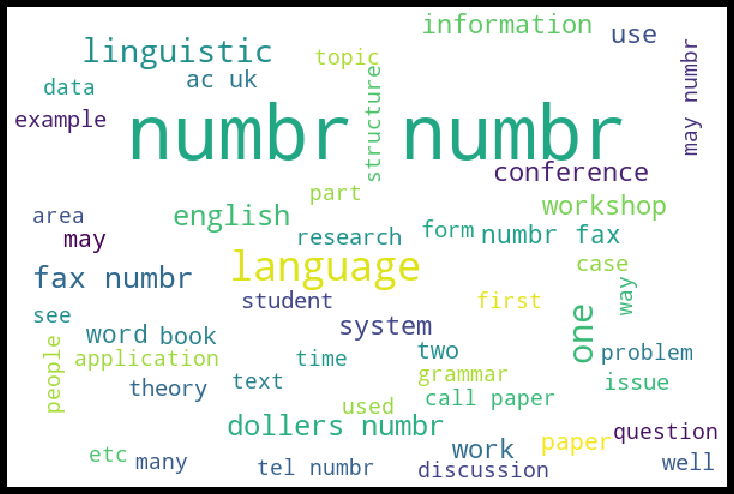

In [18]:
hams = df['message'][df['label']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [19]:
tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(df['message'])

X = features
y = df['label']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 44)

In [21]:
lr= LogisticRegression()
tree = DecisionTreeClassifier()
knn =  KNeighborsClassifier()
svc = SVC()
forest = RandomForestClassifier()
ada = AdaBoostClassifier()
gnb = MultinomialNB()

models = {lr:'LogisticRegression',
          tree:'DecisionTree',
          knn: 'KNN',
          svc: 'SVC',
          forest: 'RandomForest',
          ada: 'Adaboost',
          gnb: 'Naive'}


def train(algo,name,X_train,y_train,X_test,y_test):
    algo.fit(X_train,y_train)
    y_pred = algo.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f"--------------------------------------------{name}---------------------------------------------------")
    print(f"Accuracy Score for {name}: {score*100:.4f}%")
    return y_test,y_pred,score

def acc_res(y_test,y_pred):
    print("Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)

    print("Classification Report")
    print(classification_report(y_test,y_pred))
    
def main(models):
    accuracy_scores = []
    for algo,name in models.items():
        y_test_train,y_pred,acc_score = train(algo,name,X_train,y_train,X_test,y_test)
        acc_res(y_test_train,y_pred)
        accuracy_scores.append(acc_score)
        
    return accuracy_scores
    
accuracy_scores = main(models)

--------------------------------------------LogisticRegression---------------------------------------------------
Accuracy Score for LogisticRegression: 97.0018%
Confusion Matrix
[[477   0]
 [ 17  73]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       477
           1       1.00      0.81      0.90        90

    accuracy                           0.97       567
   macro avg       0.98      0.91      0.94       567
weighted avg       0.97      0.97      0.97       567

--------------------------------------------DecisionTree---------------------------------------------------
Accuracy Score for DecisionTree: 95.2381%
Confusion Matrix
[[459  18]
 [  9  81]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       477
           1       0.82      0.90      0.86        90

    accuracy                           0.95       567
   macro avg       

In [22]:
from sklearn.externals import joblib
joblib.dump(ada,'spam.pkl')

['spam.pkl']